# Project 3 Solution - Draft

# Import Libraries

In [261]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
# import pydotplus
# import graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Read dataset

In [2]:
df_main = pd.read_csv('bank-full.csv')
df_main.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
print('')
print('Count of rows and columns present in dataset')
print('')
df_main.shape


Count of rows and columns present in dataset



(45211, 17)

In [4]:
df_main.isnull().values.any() # If there are any null values in data set

False

In [5]:
print('')
print('Info about dataset')
print('')
df_main.info()


Info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df_main.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# Observation

Age: 
    Average age of the members is ~41. 
    The youngest member is 18 and oldest is 95.
    The interquartile range for age of members is 48-33 = 15. 

Balance:
    Average bank balance of members is $1362
    
    The minimum balance is a negative value(-$8019) and the maximum value is  $102127
The dataset needs to be normalized 

In [7]:
# Convert columns with object datatype to categorical

for feature in df_main.columns: # Loop through all columns in the dataframe
    if df_main[feature].dtype == 'object': # Only apply for columns with categorical strings
        df_main[feature] = pd.Categorical(df_main[feature])# Replace strings with an integer
df_main.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [8]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [9]:
df_main.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


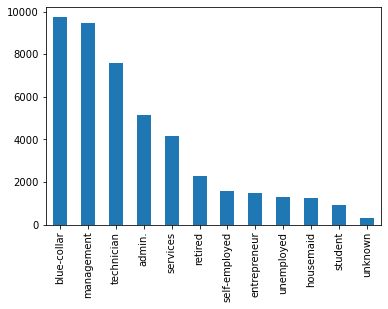

In [10]:
print(df_main.job.value_counts())

df_main['job'].value_counts().plot(kind='bar')

# Observation - job
There are 12 unique job types.

Out of the 45211 records, the job of 288 members is unknown, which needs to be defaulted to an appropriate value based on analysis.

Assumption: This is a hierarchical classification variable that could have an impact on the target.

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


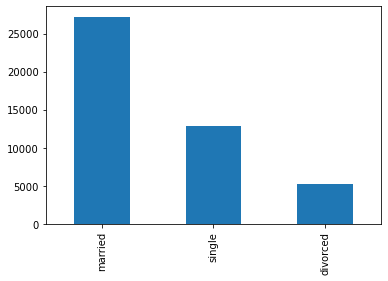

In [11]:
print(df_main.marital.value_counts())

df_main['marital'].value_counts().plot(kind='bar')

# Observation - marital

There are 3 unique marital statuses. 5207 members are divorced, 27214 are married and 12790 of them are single.

Assumption: This may not have a major impact on the target veriable. Needs to be analyzed further for correlation.

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


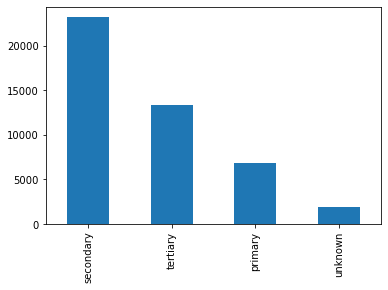

In [12]:
print(df_main.education.value_counts())

df_main['education'].value_counts().plot(kind='bar')

# Observation - education

There are 4 unique education levels.

Out of the 45211 total records, 1857 do not have a value for education(marked as unknown) which need to be defaulted to an appropriate value based on analysis.

Assumption: This is a hierarchical classification variable that could have an impact on the target.

In [13]:
print(df_main.default.value_counts())

no     44396
yes      815
Name: default, dtype: int64


# Observation - default

This is a Yes/No flag to indicate if a member has a default in their credit history.
out of a total of 45211 records, 815 have a default in the credit history and 44396 don't. 

Assumption: This is a classification variable that could have an impact on the target.

In [14]:
print(df_main.housing.value_counts())

yes    25130
no     20081
Name: housing, dtype: int64


In [15]:
print(df_main.loan.value_counts())


no     37967
yes     7244
Name: loan, dtype: int64


# Observation - housing

This is a Yes/No flag to indicate if a member currently has a housing loan.

Out of the 45211 total records, 25130 have a housing loan and 20081 do not.

Assumption: This is a classification variable that could have an impact on the target.

# Observation - loan

This is a Yes/No flag to indicate if a member currently has a personal loan.

out of a total of 45211 records, 7244 have a personal loan and 37967 do not.

Assumption: This is a classification variable that could have an impact on the target.

In [16]:
print(df_main.contact.value_counts())

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


# Observation - contact

There are 3 different contact types. out of 45211 records, 29285 were contacted through their cellular phones, 2906 were contacted through their telephones and contact type for 13020 records is unknown.


Assumption: This is a classification variable that may not impact the target variable.

In [17]:
print(df_main.poutcome.value_counts())

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


# Observation - previous outcome(poutcome)

There are 4 different outcome types from the previous campaign. The previous campaign was successful for 1511 members and failed for 4901 members. For 1840 members, the campaign resulted in other outcomes, while the outcomes for 36959 members are unknown.The unknown records need to be defaulted to an appropriate value based on analysis.

Assumption: This is a classification variable that may have an impact on the target variable.

In [18]:
print(df_main.Target.value_counts())

no     39922
yes     5289
Name: Target, dtype: int64


In [53]:
print(df_main.age.value_counts())

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64


# Observation - Target

This is a Yes/No flag to indicate if a member is currently subscribed for a term deposit.
Out of the total of 45211 records, 5289 are subscribed for a term deposit and 39922 are not.

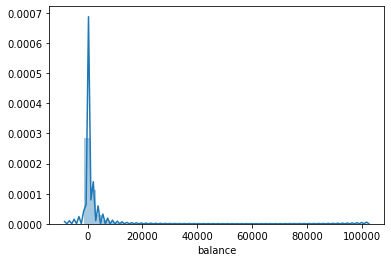

In [19]:
# distplot for balance
sns.distplot(df_main['balance'])

# Bivariate Analysis

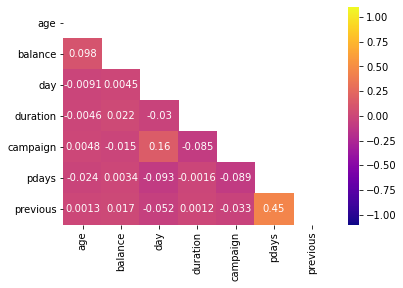

In [20]:
# Heatmap
matrix = np.triu(df_main.corr())
sns.heatmap(df_main.corr(), annot=True, mask=matrix, vmin=-1.1,vmax=1.1, cmap='plasma')

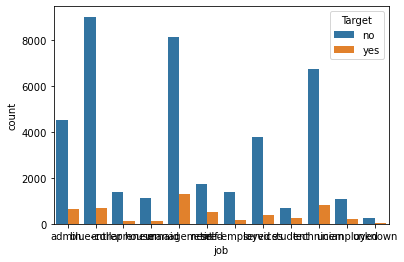

<Figure size 2160x720 with 0 Axes>

In [21]:
x = sns.countplot(x="job", hue="Target", data=df_main)

# To increase the size of the graph
plt.rcParams['figure.figsize'] = (30,10)

plt.show()

# To change angle of labels to avoid overlapping
x.set_xticklabels(x.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()

# To increase label text size
SMALL_SIZE = 20
MEDIUM_SIZE = 30
LARGE_SIZE = 40

plt.rc('axes', titlesize=LARGE_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=LARGE_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels

# To increase the size of the graph
plt.rcParams['figure.figsize'] = (30,10)

# To display the graph
plt.show()

# Observation

The count of unknown & unemployed job values is negligible compared to the total number of records. Hence unknown values for job can be marked the same as unemployed.

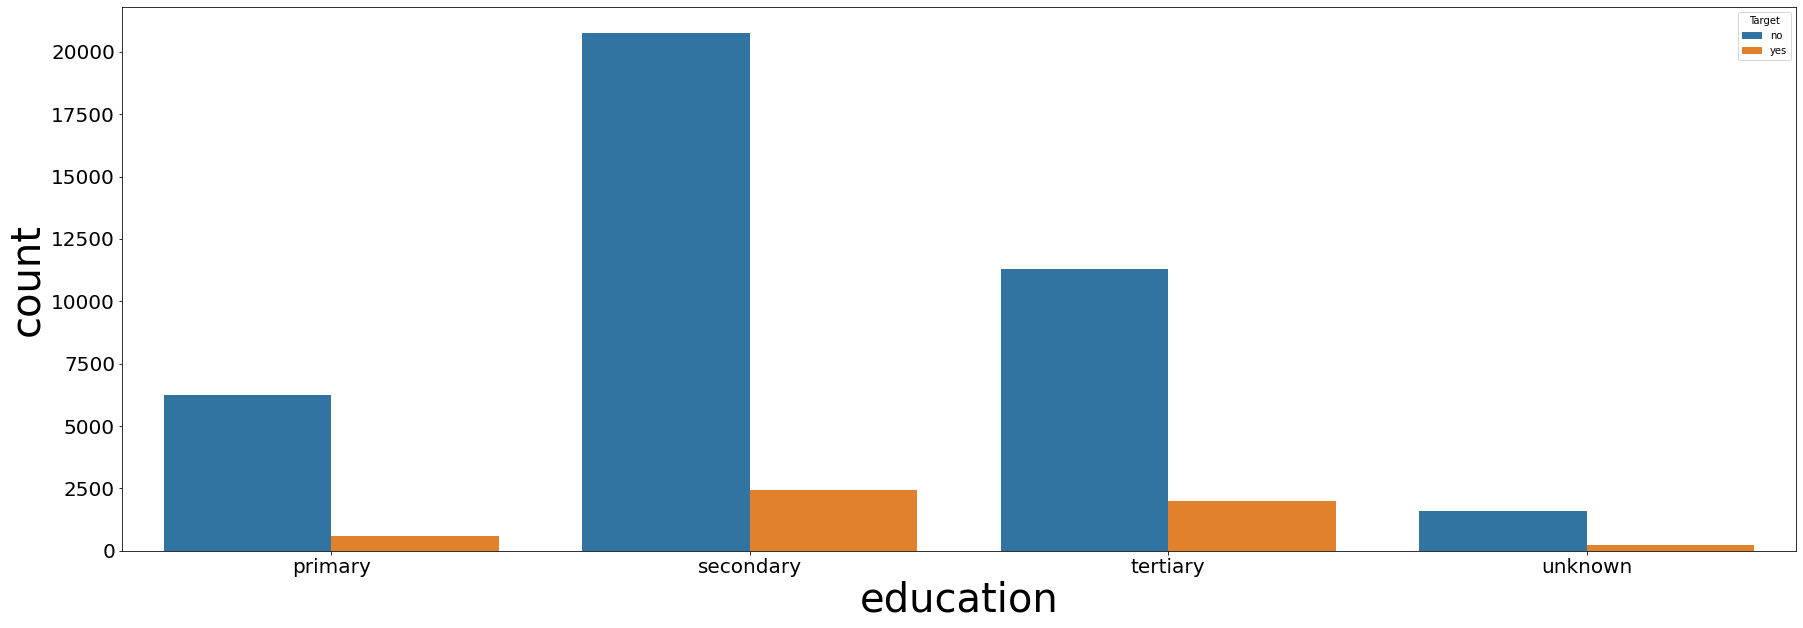

In [22]:
sns.countplot(x="education", hue="Target", data=df_main)

# Observation

The count of unknown & primary education values is negligible compared to the total number of records. Hence unknown values for education can be marked the same as primary.

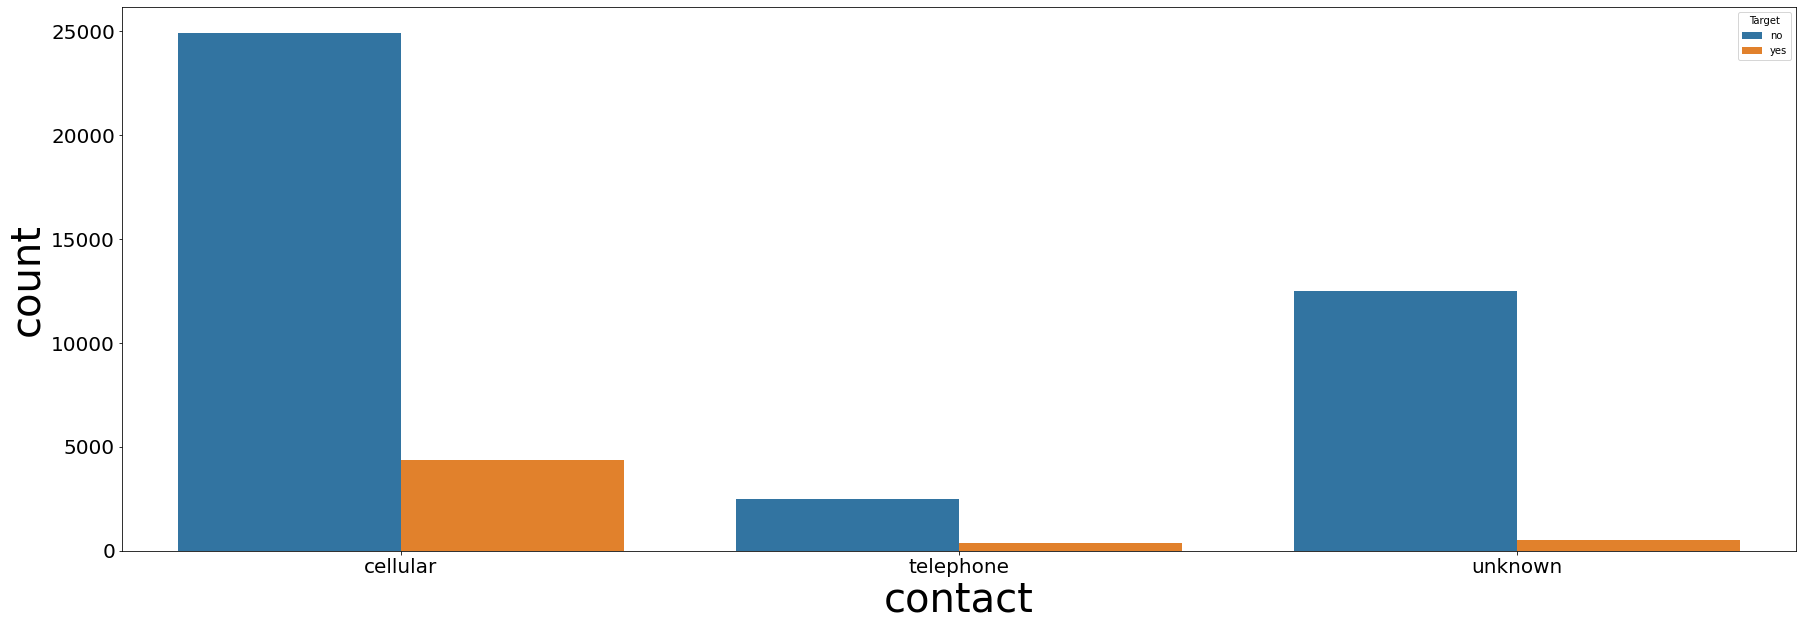

In [23]:
sns.countplot(x="contact", hue="Target", data=df_main)

# Observation

This field is a candidate for one hot encoding.

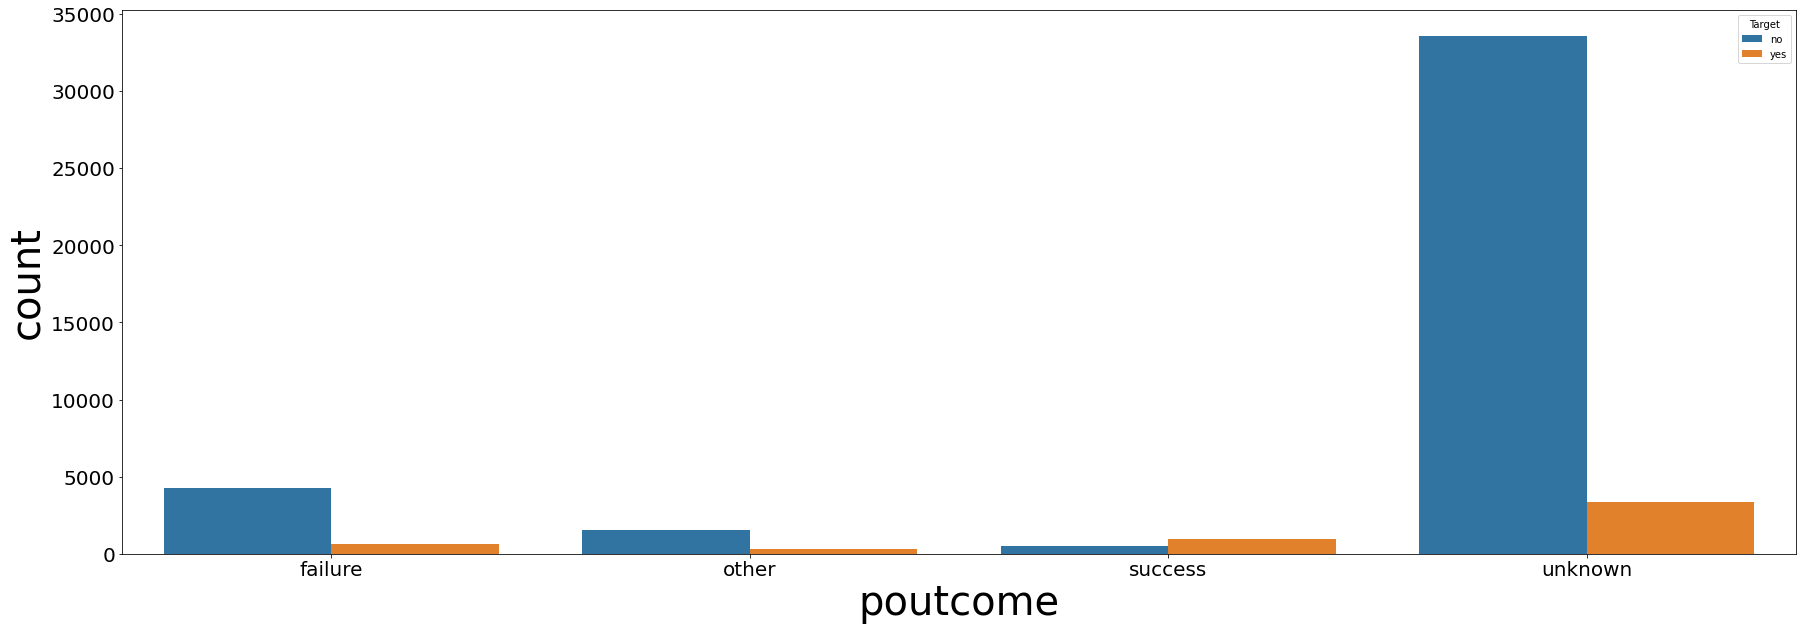

In [24]:
sns.countplot(x="poutcome", hue="Target", data=df_main)

# Observation

The number of unknown values is way too high to be ignored. This shall be marked as a separate category in the hierarchy.

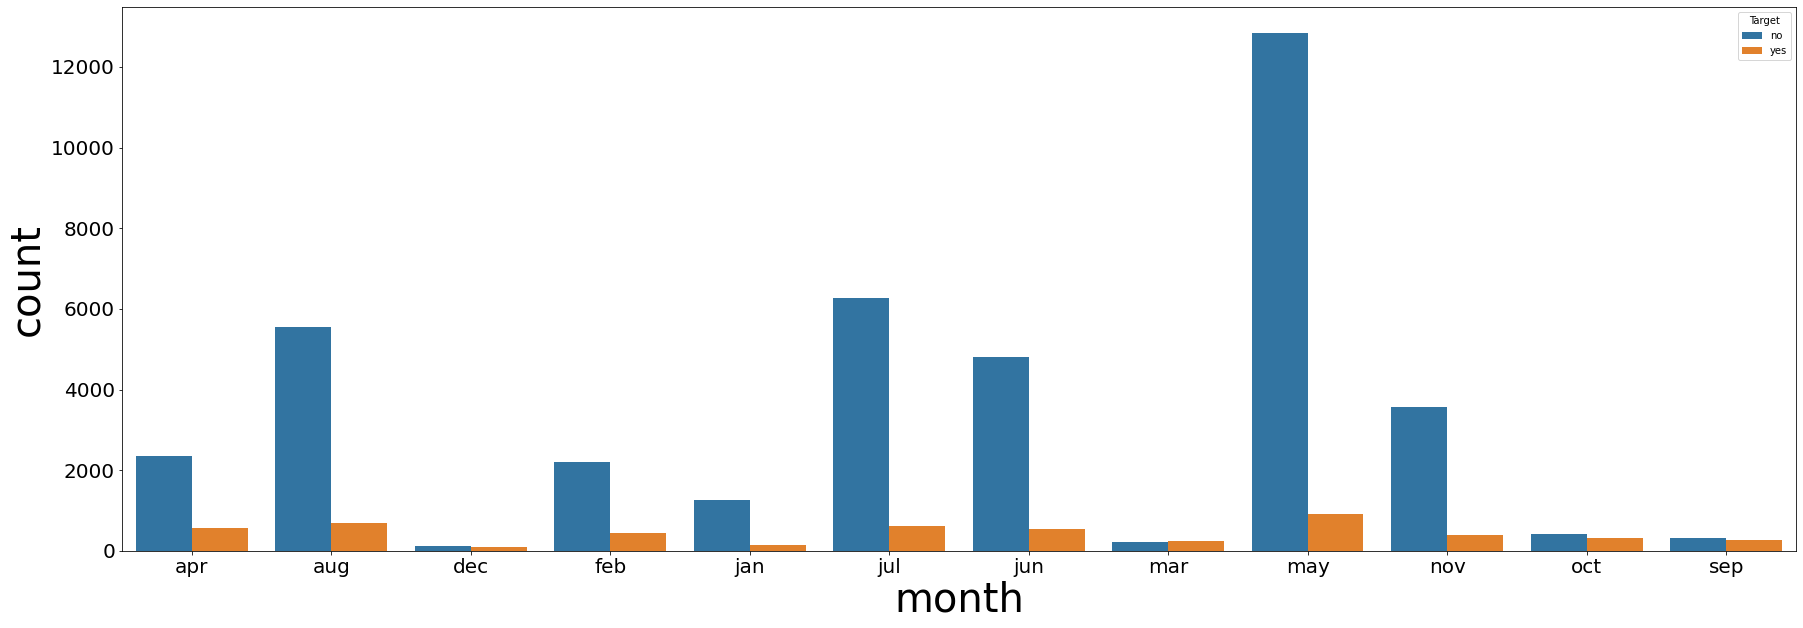

In [25]:
sns.countplot(x="month", hue="Target", data=df_main)

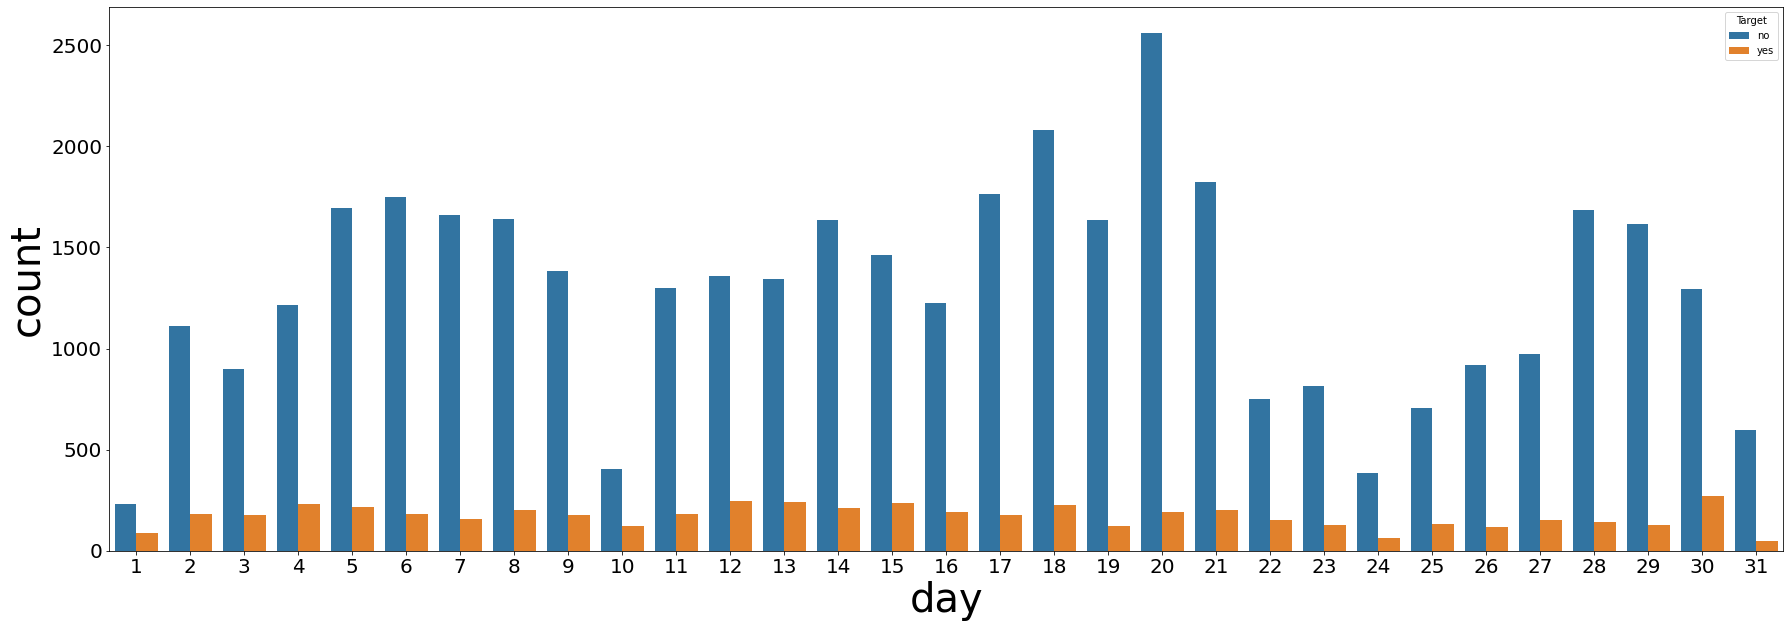

In [26]:
sns.countplot(x="day", hue="Target", data=df_main)

/Users/muraliharidass/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/muraliharidass/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


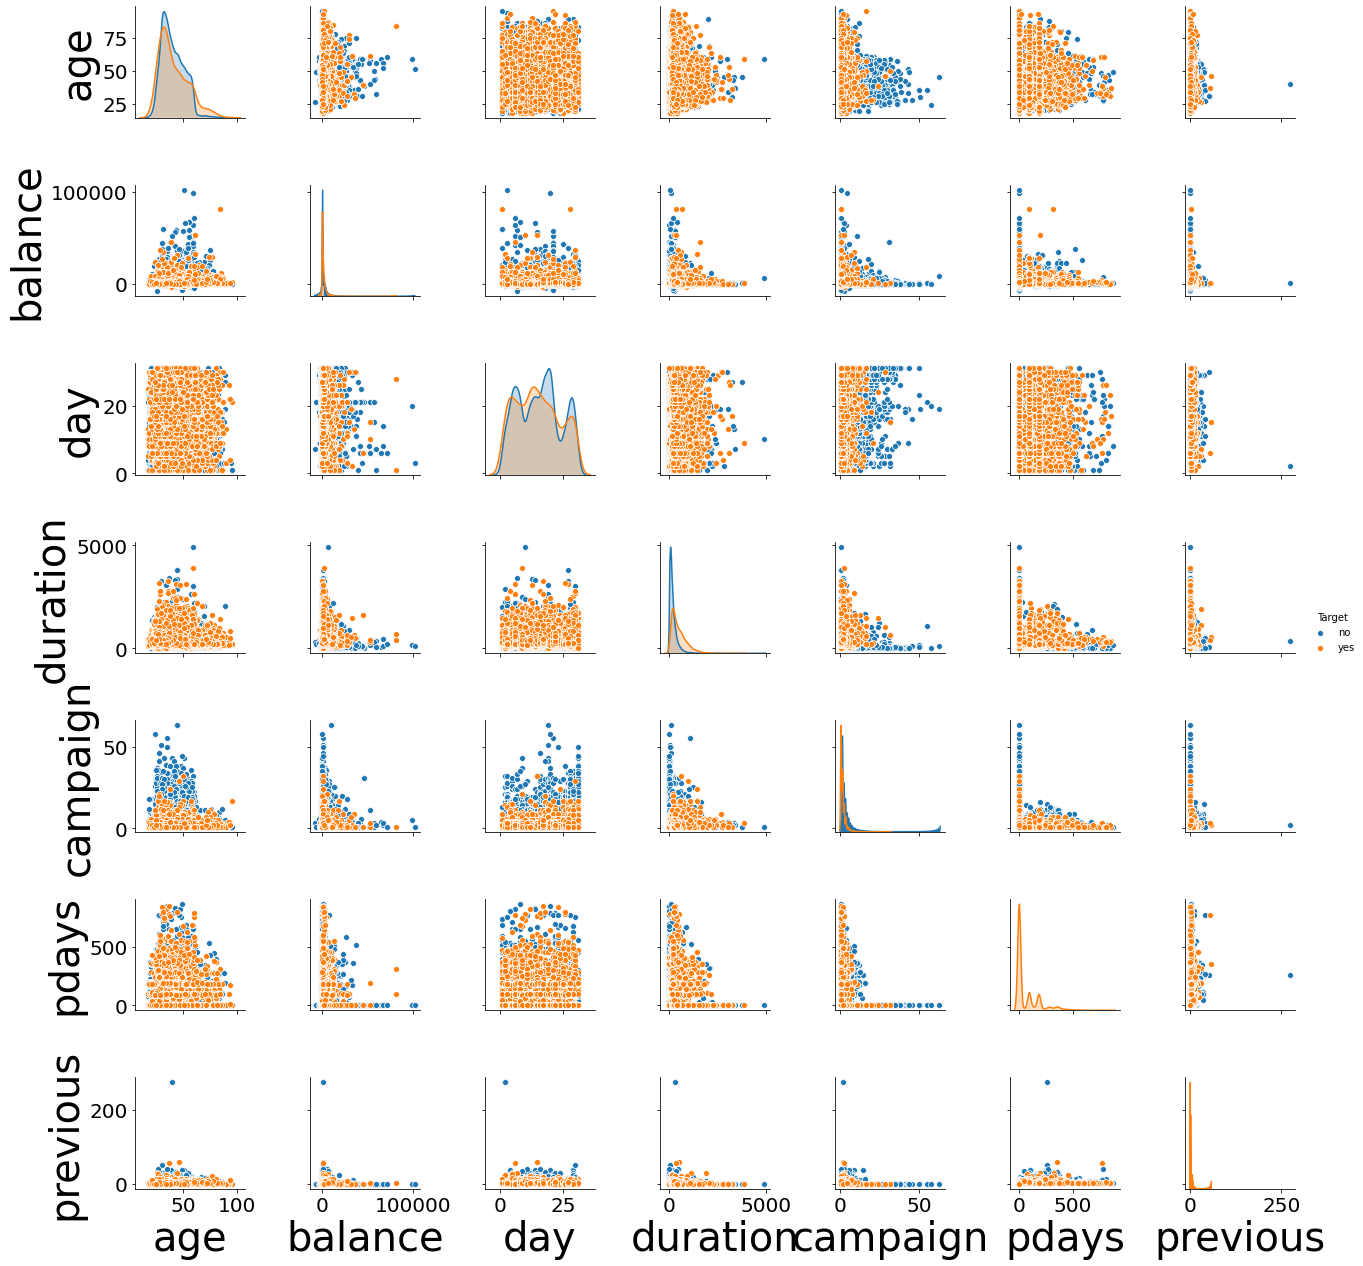

In [27]:
sns.pairplot(df_main, hue = 'Target')

In [28]:
# Create a backup of df_main before assigning categories
df_main_bkp = df_main.copy()
df_main_bkp.shape


(45211, 17)

In [29]:
# TO revert df_main back to original in case of issues
# Uncomment and run only if needed
df_main = df_main_bkp.copy()
df_main.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [30]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


# Categorical Variables

The fields job, education, contact, default, housing, loan, poutcome are candidates for hierarchical categorization by rank since they seem to have some influence on the target variable based on the above graphs.

The fields marital, contact, month are candidates for one-hot encoding of category variables.

In [31]:
replaceStruct = {
                "job":     {"blue-collar": 1, "management": 2 ,"technician": 3 ,"admin.": 4,"services": 5,"retired": 6, "self-employed": 7, "entrepreneur": 8, "unemployed": 9, "housemaid": 10, "student": 11 , "unknown":-1},
                "education": {"primary": 1, "secondary":2 , "tertiary": 3, "unknown":-1},
                 "contact": {"telephone": 1, "cellular":2 ,"unknown": -1},
                 "default":     {"no": 1, "yes": 2},
                "housing":     {"no": 1, "yes": 2},
                "loan":     {"no": 1, "yes": 2},
                "poutcome":     {"failure": 0, "other": 1, "success": 2, "unknown": -1} ,
                "Target": {"yes": 1, "no": 0}
                    }
oneHotCols=["marital","contact","month"]

In [32]:
df_main=df_main.replace(replaceStruct)
df_main=pd.get_dummies(df_main, columns=oneHotCols)
df_main.head(10)

,age,job,education,default,balance,housing,loan,day,duration,campaign,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2,3,1,2143,2,1,5,261,1,...,0,0,0,0,0,0,1,0,0,0
1,44,3,2,1,29,2,1,5,151,1,...,0,0,0,0,0,0,1,0,0,0
2,33,8,2,1,2,2,2,5,76,1,...,0,0,0,0,0,0,1,0,0,0
3,47,1,-1,1,1506,2,1,5,92,1,...,0,0,0,0,0,0,1,0,0,0
4,33,-1,-1,1,1,1,1,5,198,1,...,0,0,0,0,0,0,1,0,0,0
5,35,2,3,1,231,2,1,5,139,1,...,0,0,0,0,0,0,1,0,0,0
6,28,2,3,1,447,2,2,5,217,1,...,0,0,0,0,0,0,1,0,0,0
7,42,8,3,2,2,2,1,5,380,1,...,0,0,0,0,0,0,1,0,0,0
8,58,6,1,1,121,2,1,5,50,1,...,0,0,0,0,0,0,1,0,0,0
9,43,3,2,1,593,2,1,5,55,1,...,0,0,0,0,0,0,1,0,0,0


In [33]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               45211 non-null  int64
 1   job               45211 non-null  int64
 2   education         45211 non-null  int64
 3   default           45211 non-null  int64
 4   balance           45211 non-null  int64
 5   housing           45211 non-null  int64
 6   loan              45211 non-null  int64
 7   day               45211 non-null  int64
 8   duration          45211 non-null  int64
 9   campaign          45211 non-null  int64
 10  pdays             45211 non-null  int64
 11  previous          45211 non-null  int64
 12  poutcome          45211 non-null  int64
 13  Target            45211 non-null  int64
 14  marital_divorced  45211 non-null  uint8
 15  marital_married   45211 non-null  uint8
 16  marital_single    45211 non-null  uint8
 17  contact_-1        45211 non-nul

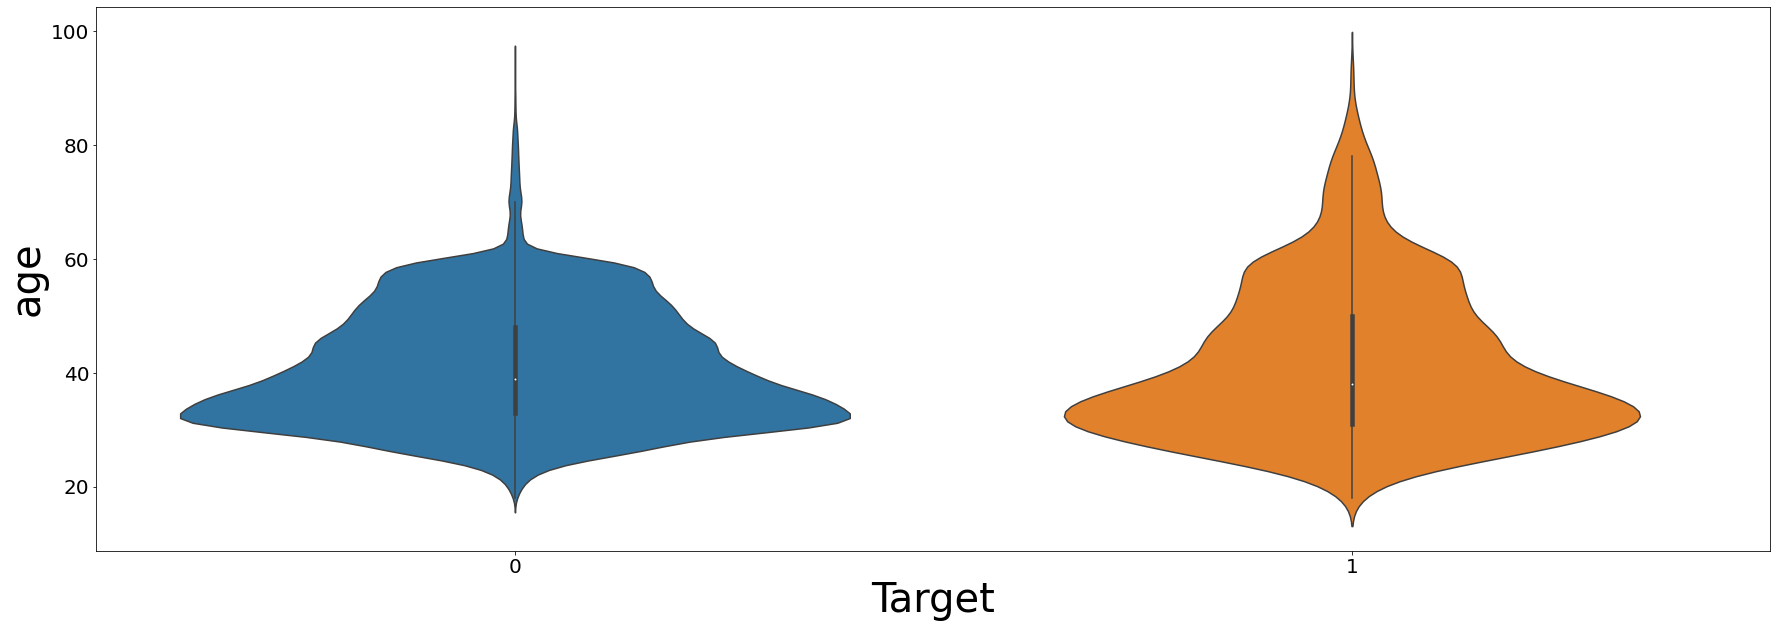

In [52]:
sns.violinplot('Target', 'age', data = df_main)

## Split Data

In [35]:
X = df_main.drop('Target',axis=1)     # Predictor feature columns (8 X m)
y = df_main['Target']   # Predicted class (1=True, 0=False) (1 X m)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               45211 non-null  int64
 1   job               45211 non-null  int64
 2   education         45211 non-null  int64
 3   default           45211 non-null  int64
 4   balance           45211 non-null  int64
 5   housing           45211 non-null  int64
 6   loan              45211 non-null  int64
 7   day               45211 non-null  int64
 8   duration          45211 non-null  int64
 9   campaign          45211 non-null  int64
 10  pdays             45211 non-null  int64
 11  previous          45211 non-null  int64
 12  poutcome          45211 non-null  int64
 13  Target            45211 non-null  int64
 14  marital_divorced  45211 non-null  uint8
 15  marital_married   45211 non-null  uint8
 16  marital_single    45211 non-null  uint8
 17  contact_-1        45211 non-nul

## Split train and test data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

# Check split of data

In [37]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df_main.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df_main.index)) * 100))

70.00% data is in training set
30.00% data is in test set


# Check count of Target values

In [38]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               45211 non-null  int64
 1   job               45211 non-null  int64
 2   education         45211 non-null  int64
 3   default           45211 non-null  int64
 4   balance           45211 non-null  int64
 5   housing           45211 non-null  int64
 6   loan              45211 non-null  int64
 7   day               45211 non-null  int64
 8   duration          45211 non-null  int64
 9   campaign          45211 non-null  int64
 10  pdays             45211 non-null  int64
 11  previous          45211 non-null  int64
 12  poutcome          45211 non-null  int64
 13  Target            45211 non-null  int64
 14  marital_divorced  45211 non-null  uint8
 15  marital_married   45211 non-null  uint8
 16  marital_single    45211 non-null  uint8
 17  contact_-1        45211 non-nul

In [39]:
print("Original Target True Values    : {0} ({1:0.2f}%)".format(len(df_main.loc[df_main['Target'] == 1]), (len(df_main.loc[df_main['Target'] == 1])/len(df_main.index)) * 100))
print("Original Target False Values   : {0} ({1:0.2f}%)".format(len(df_main.loc[df_main['Target'] == 0]), (len(df_main.loc[df_main['Target'] == 0])/len(df_main.index)) * 100))
print("")
print("Training Target True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Target False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Target True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Target False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Target True Values    : 5289 (11.70%)
Original Target False Values   : 39922 (88.30%)

Training Target True Values    : 3738 (11.81%)
Training Target False Values   : 27909 (88.19%)

Test Target True Values        : 1551 (11.43%)
Test Target False Values       : 12013 (88.57%)



# Model using Logistic Regression

In [40]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.001428  0.018275  0.091557 -0.491242  0.000017 -0.737625 -0.457043   

          7         8        9  ...        22        23        24        25  \
0  0.007847  0.004269 -0.09755  ... -0.329527 -1.316207 -0.873738  0.421041   

         26        27       28        29        30  intercept  
0  1.473108 -0.450758 -1.00757  0.923828  0.927241  -0.536032  

[1 rows x 32 columns]


In [41]:
model_score = model.score(X_test, y_test)
print(model_score)

0.8991447950457092


# Confusion Matrix

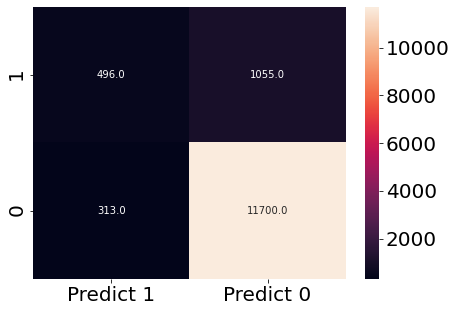

In [42]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt=".1f")

In [43]:
# Confusion matrix - Crosstab
pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,11700,313
1,1055,496


# Observation
The confusion matrix

True Positives (TP): we correctly predicted that they subscribe to term deposit 496

True Negatives (TN): we correctly predicted that they will not subscribe to term deposit 11700

False Positives (FP): we incorrectly predicted that they will subscribe to term deposit (a "Type I error") 313 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they will not subscribe to term deposit(a "Type II error") 1055 Falsely predict negative Type II error

# ROC Curve, Precision - Recall, AUC Score, F1 Score

In [44]:
lr_auc = roc_auc_score(y_test, y_predict)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.647


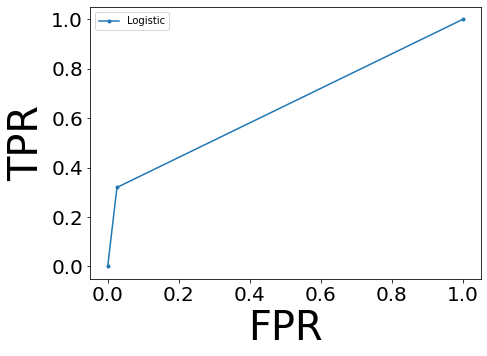

In [45]:
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_predict)
# plot the roc curve for the model
plt.figure(figsize = (7,5))
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('FPR') # False Positive Rate
plt.ylabel('TPR') # True Positive Rate
# show the legend
plt.legend()
# show the plot
plt.show()

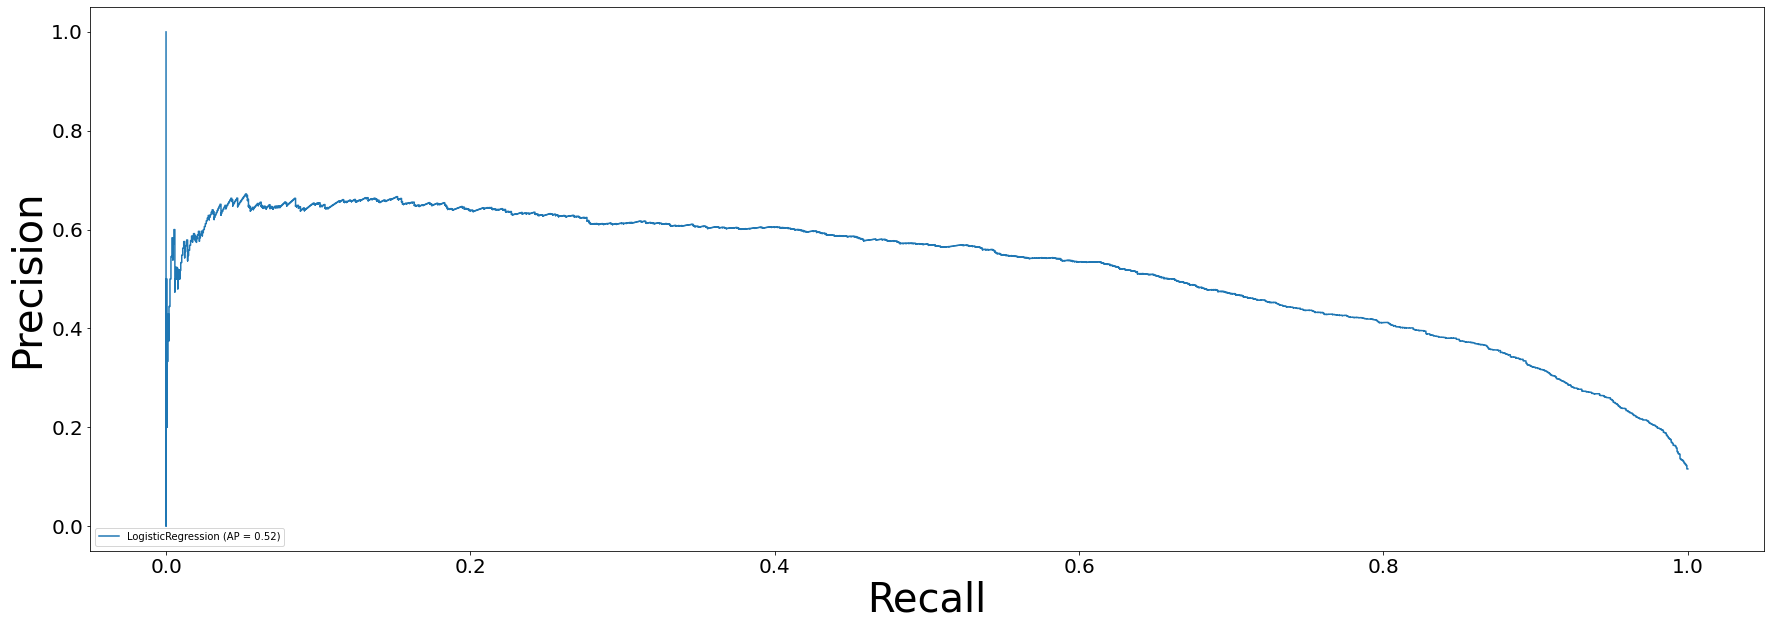

In [46]:
disp = plot_precision_recall_curve(model, X_test, y_test)
disp

In [47]:
lr_f1 = f1_score(y_test, y_predict)
print('Logistic: F1 Score=%.3f' % (lr_f1))

Logistic: F1 Score=0.420


# Decision Tree 

In [104]:
X = df_main.drop('Target',axis=1)     # Predictor feature columns (8 X m)
y = df_main['Target']   # Predicted class (1=True, 0=False) (1 X m)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               45211 non-null  int64
 1   job               45211 non-null  int64
 2   education         45211 non-null  int64
 3   default           45211 non-null  int64
 4   balance           45211 non-null  int64
 5   housing           45211 non-null  int64
 6   loan              45211 non-null  int64
 7   day               45211 non-null  int64
 8   duration          45211 non-null  int64
 9   campaign          45211 non-null  int64
 10  pdays             45211 non-null  int64
 11  previous          45211 non-null  int64
 12  poutcome          45211 non-null  int64
 13  Target            45211 non-null  int64
 14  marital_divorced  45211 non-null  uint8
 15  marital_married   45211 non-null  uint8
 16  marital_single    45211 non-null  uint8
 17  contact_-1        45211 non-nul

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42, shuffle=True)

In [106]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df_main.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df_main.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [107]:
print("Original Target True Values    : {0} ({1:0.2f}%)".format(len(df_main.loc[df_main['Target'] == 1]), (len(df_main.loc[df_main['Target'] == 1])/len(df_main.index)) * 100))
print("Original Target False Values   : {0} ({1:0.2f}%)".format(len(df_main.loc[df_main['Target'] == 0]), (len(df_main.loc[df_main['Target'] == 0])/len(df_main.index)) * 100))
print("")
print("Training Target True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Target False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Target True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Target False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Target True Values    : 5289 (11.70%)
Original Target False Values   : 39922 (88.30%)

Training Target True Values    : 3691 (11.66%)
Training Target False Values   : 27956 (88.34%)

Test Target True Values        : 1598 (11.78%)
Test Target False Values       : 11966 (88.22%)



In [108]:
# create a regressor object 
classifier = DecisionTreeClassifier(random_state = 0)  
  
# fit the regressor with X and Y data 
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=0)

In [127]:
y_pred = classifier.predict(X_test) 
print(y_pred)

[0 0 0 ... 0 0 0]


In [110]:
classifier_score = classifier.score(X_train, y_train)

In [111]:
# Have a look at R_squared to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('coefficient of determination R^2 of the prediction.: ',classifier_score)

coefficient of determination R^2 of the prediction.:  1.0


In [112]:
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f'% r2_score(y_test, y_pred))

Mean squared error: 0.12
Test Variance score: -0.18


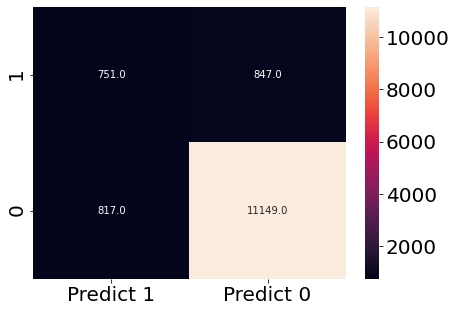

In [113]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt=".1f")

In [114]:
# Confusion matrix - Crosstab
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,11149,817
1,847,751


## Observation
The confusion matrix

True Positives (TP): we correctly predicted that they subscribe to term deposit 751

True Negatives (TN): we correctly predicted that they will not subscribe to term deposit 11149

False Positives (FP): we incorrectly predicted that they will subscribe to term deposit (a "Type I error") 817 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they will not subscribe to term deposit(a "Type II error") 847 Falsely predict negative Type II error

In [115]:
lr_auc = roc_auc_score(y_test, y_pred)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.701


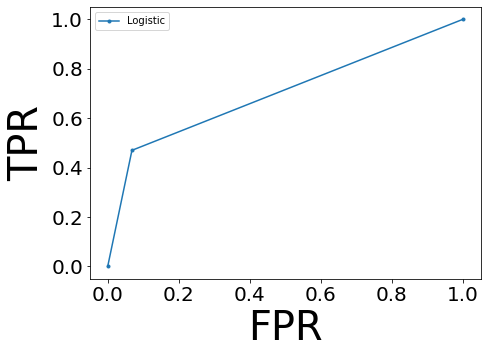

In [116]:
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
# plot the roc curve for the model
plt.figure(figsize = (7,5))
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('FPR') # False Positive Rate
plt.ylabel('TPR') # True Positive Rate
# show the legend
plt.legend()
# show the plot
plt.show()

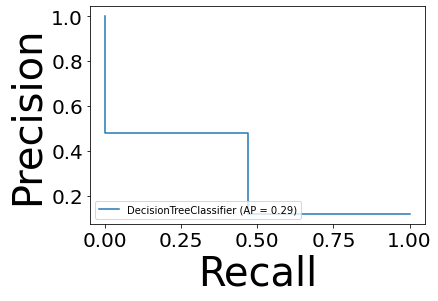

In [177]:
disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp

In [118]:
lr_f1 = f1_score(y_test, y_pred)
print('Logistic: F1 Score=%.3f' % (lr_f1))

Logistic: F1 Score=0.474


# Prune Decision Tree

In [167]:
# create a regressor object 
classifier_prune = DecisionTreeClassifier(random_state = 0, max_depth = 10)  
  
# fit the regressor with X and Y data 
classifier_prune.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=10, random_state=0)

In [168]:
y_pred_prune = classifier_prune.predict(X_test) 
print(y_pred_prune)

[0 0 0 ... 0 0 0]


In [169]:
classifier_prune_score = classifier_prune.score(X_train, y_train)

In [170]:
print('coefficient of determination R^2 of the prediction.: ',classifier_prune_score)

coefficient of determination R^2 of the prediction.:  0.9276076721332196


In [171]:
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred_prune))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f'% r2_score(y_test, y_pred_prune))

Mean squared error: 0.10
Test Variance score: 0.02


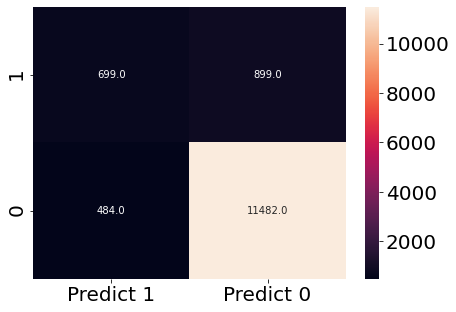

In [172]:
cm_prune=metrics.confusion_matrix(y_test, y_pred_prune, labels=[1, 0])

df_cm = pd.DataFrame(cm_prune, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt=".1f")

In [173]:
# Confusion matrix - Crosstab
pd.crosstab(y_test, y_pred_prune, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,11482,484
1,899,699


## Observation
The confusion matrix

True Positives (TP): we correctly predicted that they subscribe to term deposit 699

True Negatives (TN): we correctly predicted that they will not subscribe to term deposit 11482

False Positives (FP): we incorrectly predicted that they will subscribe to term deposit (a "Type I error") 484 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they will not subscribe to term deposit(a "Type II error") 899 Falsely predict negative Type II error

In [175]:
lr_auc = roc_auc_score(y_test, y_pred_prune)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.698


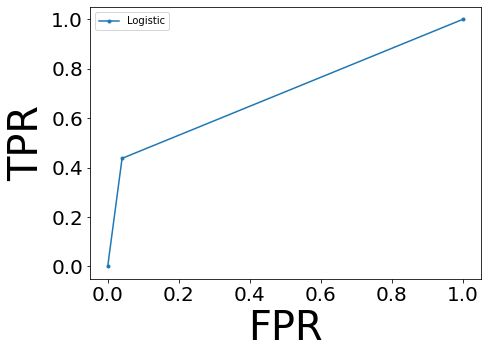

In [176]:
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred_prune)
# plot the roc curve for the model
plt.figure(figsize = (7,5))
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('FPR') # False Positive Rate
plt.ylabel('TPR') # True Positive Rate
# show the legend
plt.legend()
# show the plot
plt.show()

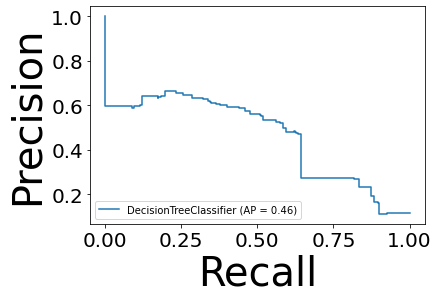

In [178]:
disp = plot_precision_recall_curve(classifier_prune, X_test, y_test)
disp

In [179]:
lr_f1 = f1_score(y_test, y_pred_prune)
print('Logistic: F1 Score=%.3f' % (lr_f1))

Logistic: F1 Score=0.503


# Ensemble Techniques

In [180]:
X = df_main.drop('Target',axis=1)     # Predictor feature columns (8 X m)
y = df_main['Target']   # Predicted class (1=True, 0=False) (1 X m)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               45211 non-null  int64
 1   job               45211 non-null  int64
 2   education         45211 non-null  int64
 3   default           45211 non-null  int64
 4   balance           45211 non-null  int64
 5   housing           45211 non-null  int64
 6   loan              45211 non-null  int64
 7   day               45211 non-null  int64
 8   duration          45211 non-null  int64
 9   campaign          45211 non-null  int64
 10  pdays             45211 non-null  int64
 11  previous          45211 non-null  int64
 12  poutcome          45211 non-null  int64
 13  Target            45211 non-null  int64
 14  marital_divorced  45211 non-null  uint8
 15  marital_married   45211 non-null  uint8
 16  marital_single    45211 non-null  uint8
 17  contact_-1        45211 non-nul

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=22, shuffle=True)
X_train.shape, X_test.shape

((31647, 31), (13564, 31))

In [182]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df_main.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df_main.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [183]:
print("Original Target True Values    : {0} ({1:0.2f}%)".format(len(df_main.loc[df_main['Target'] == 1]), (len(df_main.loc[df_main['Target'] == 1])/len(df_main.index)) * 100))
print("Original Target False Values   : {0} ({1:0.2f}%)".format(len(df_main.loc[df_main['Target'] == 0]), (len(df_main.loc[df_main['Target'] == 0])/len(df_main.index)) * 100))
print("")
print("Training Target True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Target False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Target True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Target False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Target True Values    : 5289 (11.70%)
Original Target False Values   : 39922 (88.30%)

Training Target True Values    : 3698 (11.69%)
Training Target False Values   : 27949 (88.31%)

Test Target True Values        : 1591 (11.73%)
Test Target False Values       : 11973 (88.27%)



In [246]:
# Decision tree classifier function

clf = DecisionTreeClassifier(criterion='entropy')

In [247]:
clf.fit(X_train, y_train)
print("Train: %.2f" % clf.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % clf.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.87


# Prune Decision Tree

In [188]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [189]:
print("Train: %.2f" % clf_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(X_test, y_test))  # performance on test data

Train: 0.90
Test: 0.90


In [190]:
y_train.value_counts()

0    27949
1     3698
Name: Target, dtype: int64

In [193]:
preds_train = clf_pruned.predict(X_train)
preds_test = clf_pruned.predict(X_test)

acc_DT = accuracy_score(y_test, preds_test)

In [194]:
# Confusion matrix
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,11755,218
1,1148,443


/Users/muraliharidass/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


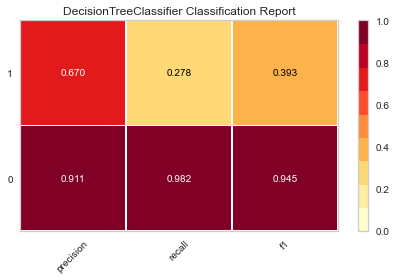

/Users/muraliharidass/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


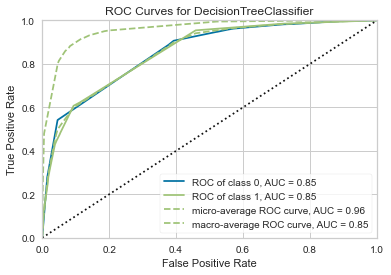

In [210]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [213]:
importances = clf_pruned.feature_importances_

In [233]:
f_imp = dict(zip(df_main.columns, clf_pruned.feature_importances_))

In [234]:
df_imp = pd.DataFrame(f_imp.items(), columns=["ColumnName", "Importance"]) 
df_imp[df_imp['Importance']>0]

,ColumnName,Importance
5,housing,0.003469
8,duration,0.590434
12,poutcome,0.277898
16,marital_single,0.114414
18,contact_1,0.005489
29,month_nov,0.008296


# Ensemble Models

In [236]:
X = df_main.drop('Target',axis=1)     # Predictor feature columns (8 X m)
y = df_main['Target']   # Predicted class (1=True, 0=False) (1 X m)
df_main.info()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=22, shuffle=True)
X_train.shape, X_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               45211 non-null  int64
 1   job               45211 non-null  int64
 2   education         45211 non-null  int64
 3   default           45211 non-null  int64
 4   balance           45211 non-null  int64
 5   housing           45211 non-null  int64
 6   loan              45211 non-null  int64
 7   day               45211 non-null  int64
 8   duration          45211 non-null  int64
 9   campaign          45211 non-null  int64
 10  pdays             45211 non-null  int64
 11  previous          45211 non-null  int64
 12  poutcome          45211 non-null  int64
 13  Target            45211 non-null  int64
 14  marital_divorced  45211 non-null  uint8
 15  marital_married   45211 non-null  uint8
 16  marital_single    45211 non-null  uint8
 17  contact_-1        45211 non-nul

((31647, 31), (13564, 31))

# Random Forest

In [237]:
# Random Forest

rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [238]:
rfcl.feature_importances_

array([0.09715473, 0.05046873, 0.02903243, 0.00185686, 0.09943035,
       0.02188506, 0.00938042, 0.08546432, 0.27564505, 0.03967257,
       0.04172302, 0.0270959 , 0.0612312 , 0.00728976, 0.01013555,
       0.00864043, 0.00987838, 0.00443153, 0.00848586, 0.01327244,
       0.00815386, 0.00409515, 0.0078225 , 0.00441706, 0.00768563,
       0.01305947, 0.01529809, 0.00973489, 0.00720151, 0.01050765,
       0.00984959])

/Users/muraliharidass/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


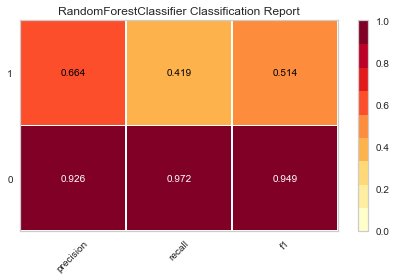

/Users/muraliharidass/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


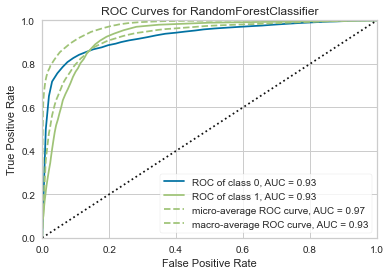

In [243]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

0.9071807726334414


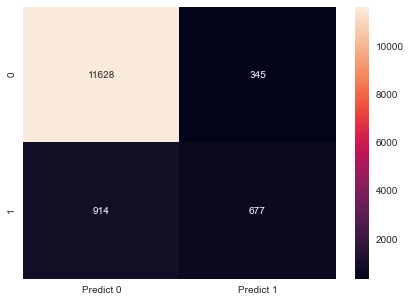

In [274]:
y_predict = rfcl.predict(X_test)

print(rfcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Bagging Classifier

In [248]:
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)
print("Train: %.2f" % clf.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % clf.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.87


In [250]:
bgcl = BaggingClassifier(base_estimator=clf, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

print("Train: %.2f" % bgcl.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % bgcl.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.90


0.9036419935122383


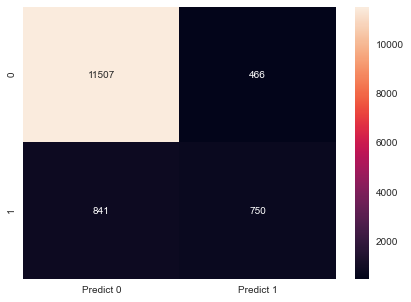

In [256]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Adaboost

In [259]:
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

print("Train: %.2f" % abcl.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % abcl.score(X_test, y_test))  # performance on test data

Train: 0.90
Test: 0.89


0.8949424948392805


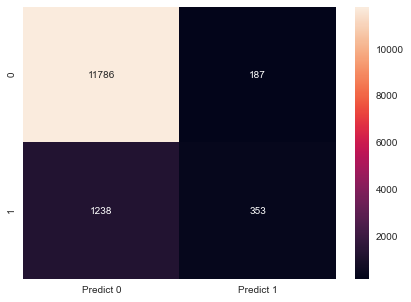

In [260]:
y_predict = abcl.predict(X_test)

print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Gradient Boost

In [262]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

print("Train: %.2f" % gbcl.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % gbcl.score(X_test, y_test))  # performance on test data

Train: 0.91
Test: 0.90


0.9042317900324388


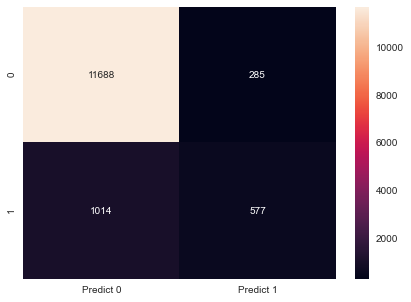

In [263]:
y_predict = gbcl.predict(X_test)

print(gbcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [273]:
#Store the accuracy results for each model in a dataframe for final comparison
pred_DT = clf.predict(X_test)
acc_DT = accuracy_score(y_test, pred_DT)

resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]

pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]

pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]

pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]

pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]

resultsDf

,Method,accuracy
0,Decision Tree,0.874300
0,Random Forest,0.907181
0,Bagging,0.903642
0,Adaboost,0.894942
0,Gradient Boost,0.904232


# Observation

Based on the comparison of metrics across modeling techniques, Random Forest is the best ensemble algorithm to predict the data.